In [1]:
import numpy as np

# data 수집

In [2]:
flat_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
flat_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

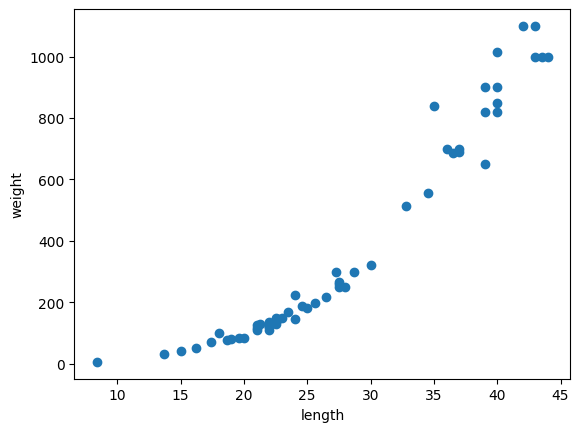

In [5]:
import matplotlib.pyplot as plt

plt.scatter(flat_length,flat_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
#data 전처리
train_input, test_input ,train_target, test_target = train_test_split(flat_length,flat_weight,random_state=42,test_size=0.25)
print(train_input.shape, test_input.shape)
#data가 1차원 배열임, 사이킷런에서 사용할 때는 2차원 배열이어야함. --> reshape(a,b) 메서드를 통해 a*b 크기로 변경한다.
print(train_input) # 행이 42개 있다는 것이 아니라 길이가 42라는 것임

(42,) (14,)
[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]


In [9]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [10]:
print(train_input.shape,test_input.shape)

(42, 1) (14, 1)


In [11]:
#ai 모델 선택
from sklearn.neighbors import KNeighborsRegressor

In [12]:
# 모델 생성
knr = KNeighborsRegressor()
#모델 훈련
knr.fit(train_input,train_target)

KNeighborsRegressor()

In [13]:
# 모델 평가(결정계수)
knr.score(test_input, test_target)

0.992809406101064

In [14]:
knr.score(train_input, train_target)

0.9698823289099254

In [16]:
# 과소적합의 문제를 해결하기 위해서 이웃의 개수를 3으로 설정한다.
knr_balanced = KNeighborsRegressor(n_neighbors=3)

knr_balanced.fit(train_input,train_target)

knr_balanced.score(test_input,test_target)

0.9746459963987609

In [17]:
knr_balanced.score(train_input,train_target)

0.9804899950518966

In [18]:
#모델 예측
print(knr.predict([[40]]))

print(knr_balanced.predict([[40]]))


[847.]
[921.66666667]


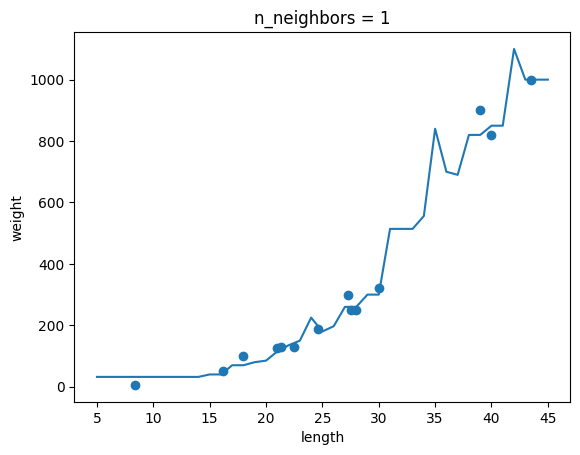

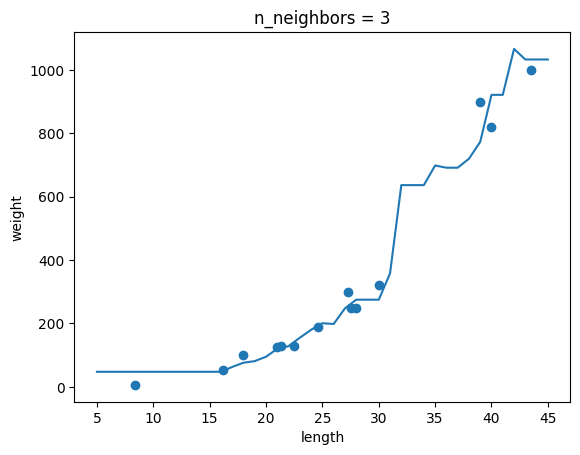

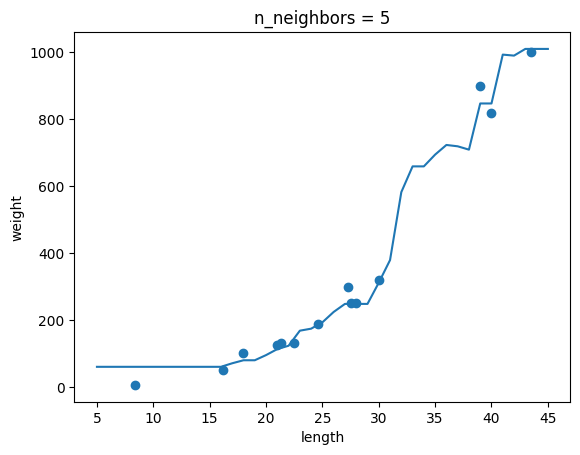

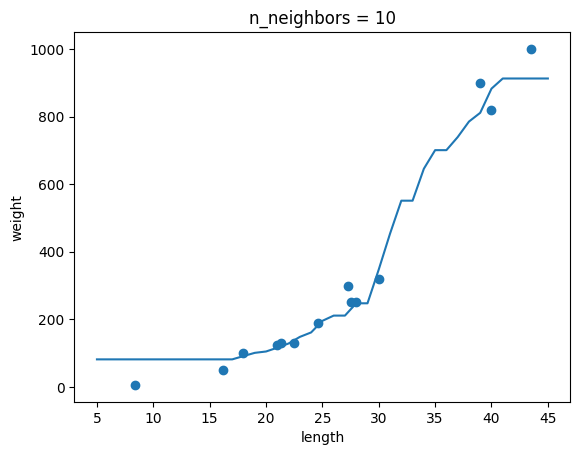

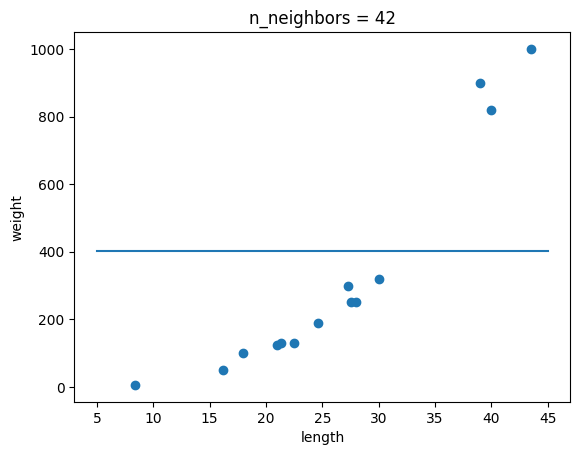

In [19]:
x = np.arange(5,46).reshape(-1,1)
knr = KNeighborsRegressor()
for n in [1,3,5,10,42]:
  knr.n_neighbors = n
  knr.fit(train_input,train_target)
  plt.scatter(test_input,test_target)
  plt.plot(x,knr.predict(x))
  plt.title("n_neighbors = {}".format(n))
  plt.xlabel("length")
  plt.ylabel("weight")
  plt.show()

In [20]:
knr_balanced.predict([[50],[150]])

array([1033.33333333, 1033.33333333])

In [21]:
#KNeighborsRegression의 한계 경계를 넘으면 값이 같아진다.

# Linear Regression y = Wx + b 의 등장